In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
df.shape

(2200, 8)

In [7]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [8]:
df['label'].value_counts()

chickpea       100
pomegranate    100
blackgram      100
mothbeans      100
apple          100
mango          100
coffee         100
banana         100
watermelon     100
lentil         100
kidneybeans    100
pigeonpeas     100
grapes         100
coconut        100
cotton         100
rice           100
papaya         100
jute           100
mungbean       100
maize          100
orange         100
muskmelon      100
Name: label, dtype: int64

In [9]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [10]:
df.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

###  Checking the Statistics for all the crops

In [11]:
print("Average Ratio of nitrogen in the soil : {0: .2f}".format(df['N'].mean()))
print("Average Ratio of Phosphorous in the soil : {0: .2f}".format(df['P'].mean()))
print("Average Ratio of Potassium in the soil : {0: .2f}".format(df['K'].mean()))
print("Average temperature in Celsius : {0: .2f}".format(df['temperature'].mean()))
print("Average Relative Humidity in % is : {0: .2f}".format(df['humidity'].mean()))
print("Average pH value of the soil : {0: .2f}".format(df['ph'].mean()))
print("Average Rain fall in mm : {0: .2f}".format(df['rainfall'].mean()))

Average Ratio of nitrogen in the soil :  50.55
Average Ratio of Phosphorous in the soil :  53.36
Average Ratio of Potassium in the soil :  48.15
Average temperature in Celsius :  25.62
Average Relative Humidity in % is :  71.48
Average pH value of the soil :  6.47
Average Rain fall in mm :  103.46


##### Above shows that nitrogen,Phosphorous and potassium should be around 50%
##### Temperature should be around 25°C and Humidity around 70%
##### Rain fall should be around 100mm and PH should be arount 7

### Checking Statistics for each Crop

In [12]:
@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    print("-------------------------------------------------")
    print("Statistics for Nitrogen :")
    print("Minimum Nitrogen Required :", x['N'].min())
    print("Average Nitrogen Required :", x['N'].mean())
    print("Maximum Nitrogen Required :", x['N'].max())
    print("-------------------------------------------------")
    print("Statistics for Phosphorous :")
    print("Minimum Phosphorous Required :", x['P'].min())
    print("Average Phosphorous Required :", x['P'].mean())
    print("Maximum Phosphorous Required :", x['P'].max())
    print("-------------------------------------------------")
    print("Statistics for Potassium :")
    print("Minimum Potassium Required :", x['K'].min())
    print("Average Potassium Required :", x['K'].mean())
    print("Maximum Potassium Required :", x['K'].max())
    print("-------------------------------------------------")
    print("Statistics for Temperature :")
    print("Minimum Temperature Required : {0: .2f}".format(x['temperature'].min()))
    print("Average Temperature Required : {0: .2f}".format(x['temperature'].mean()))
    print("Maximum Temperature Required : {0: .2f}".format(x['temperature'].max()))
    print("-------------------------------------------------")
    print("Statistics for Humidity :")
    print("Minimum Humidity Required : {0: .2f}".format(x['humidity'].min()))
    print("Average Humidity Required : {0: .2f}".format(x['humidity'].mean()))
    print("Maximum Humidity Required : {0: .2f}".format(x['humidity'].max()))
    print("-------------------------------------------------")
    print("Statistics for PH :")
    print("Minimum PH Required : {0: .2f}".format(x['ph'].min()))
    print("Average PH Required : {0: .2f}".format(x['ph'].mean()))
    print("Maximum PH Required : {0: .2f}".format(x['ph'].max()))
    print("-------------------------------------------------")
    print("Statistics for Rainfall :")
    print("Minimum Rainfall Required : {0: .2f}".format(x['rainfall'].min()))
    print("Average Rainfall Required : {0: .2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall Required : {0: .2f}".format(x['rainfall'].max()))
    print("-------------------------------------------------")
    

interactive(children=(Dropdown(description='crops', options=('chickpea', 'pomegranate', 'blackgram', 'mothbean…

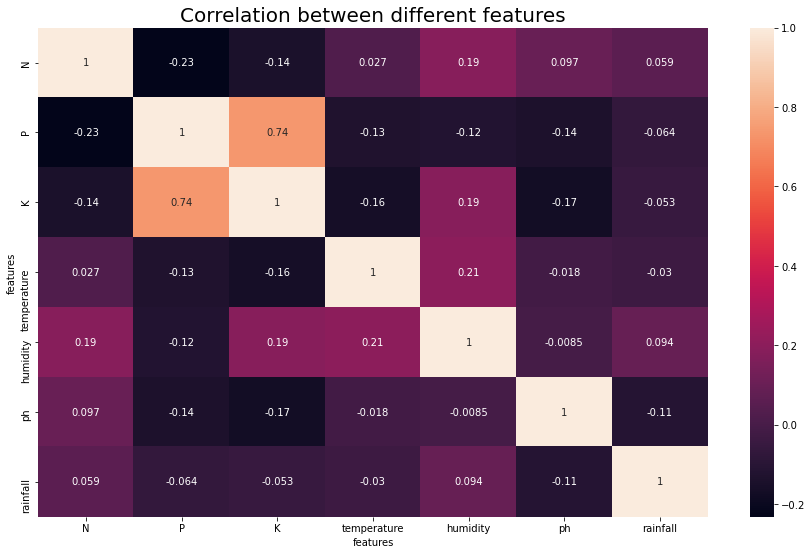

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 9))
sns.heatmap(df.corr(), annot=True)
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 20, c='black')
plt.show()

###### P and K have are highly correlated otherwise there is low correlation between the features.

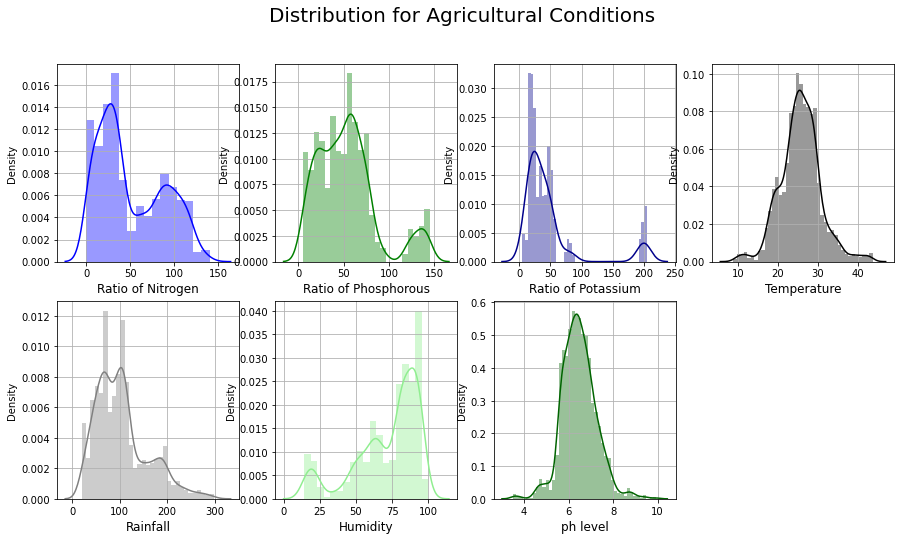

In [14]:
#Distribution for Agricultural Conditions
plt.figure(figsize=(15,8))
plt.subplot(2,4,1)
sns.distplot(df['N'],color = 'blue')
plt.xlabel('Ratio of Nitrogen',fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(df['P'],color = 'green')
plt.xlabel('Ratio of Phosphorous',fontsize = 12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(df['K'],color = 'darkblue')
plt.xlabel('Ratio of Potassium',fontsize = 12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(df['temperature'],color = 'black')
plt.xlabel('Temperature',fontsize = 12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(df['rainfall'],color = 'grey')
plt.xlabel('Rainfall',fontsize = 12)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(df['humidity'],color = 'lightgreen')
plt.xlabel('Humidity',fontsize = 12)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(df['ph'],color = 'darkgreen')
plt.xlabel('ph level',fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()


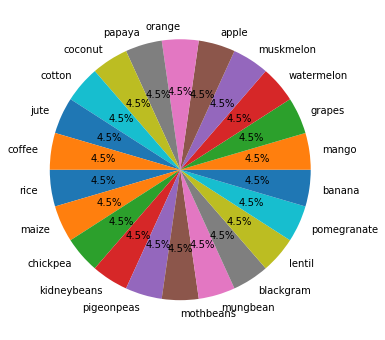

In [15]:
D = df['label'].value_counts()
plt.figure(figsize=(12,6))
lab = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']
plt.pie(D, labels=lab, autopct='%1.1f%%', startangle=180);



In [16]:
df[df['label']=='apple'].count()

N              100
P              100
K              100
temperature    100
humidity       100
ph             100
rainfall       100
label          100
dtype: int64

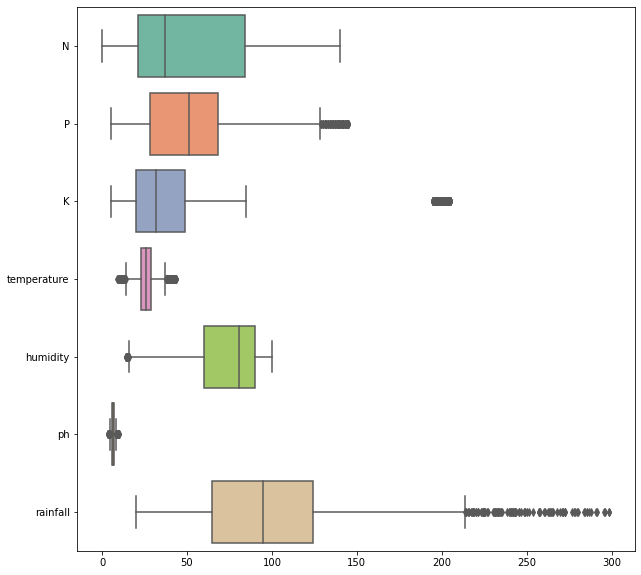

In [17]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df, orient="h", palette="Set2");

### Lets compare the average Requirement for each crops with average conditions


In [18]:
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for",conditions,"is {0: .2f}".format(df[conditions].mean()))
    print("----------------------------------------------------------------")
    print("Rice : {0: .2f}".format(df[(df['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0: .2f}".format(df[(df['label'] == 'blackgram')][conditions].mean()))
    print("Banana : {0: .2f}".format(df[(df['label'] == 'banana')][conditions].mean()))
    print("Jute : {0: .2f}".format(df[(df['label'] == 'jute')][conditions].mean()))
    print("Coconut : {0: .2f}".format(df[(df['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0: .2f}".format(df[(df['label'] == 'apple')][conditions].mean()))
    print("Papaya : {0: .2f}".format(df[(df['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0: .2f}".format(df[(df['label'] == 'muskmelon')][conditions].mean()))
    print("Grapes : {0: .2f}".format(df[(df['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0: .2f}".format(df[(df['label'] == 'watermelon')][conditions].mean()))
    print("Kedney Beans : {0: .2f}".format(df[(df['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0: .2f}".format(df[(df['label'] == 'mungbean')][conditions].mean()))
    print("Oranges : {0: .2f}".format(df[(df['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0: .2f}".format(df[(df['label'] == 'chickpea')][conditions].mean()))
    print("Lentils : {0: .2f}".format(df[(df['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0: .2f}".format(df[(df['label'] == 'cotton')][conditions].mean()))
    print("Maize : {0: .2f}".format(df[(df['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0: .2f}".format(df[(df['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeon peas : {0: .2f}".format(df[(df['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0: .2f}".format(df[(df['label'] == 'mango')][conditions].mean()))
    print("Pomegrante : {0: .2f}".format(df[(df['label'] == 'pomegrante')][conditions].mean()))
    print("Coffee : {0: .2f}".format(df[(df['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [19]:
# Crops requires more rainfall,temperature,humidity,Nitrogen,Potassium,Phosphorous and ph value VS Crops requires Less 
@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average",conditions,'\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("-------------------------------------------------------")
    print("Crops which require less than average",conditions,'\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [20]:
# By using dataset, Find the best suitable Crop for Summer Season,Winter Season and Rainy Season
print("Summer Crops")
print(df[(df['temperature'] > 30) & (df['humidity'] > 50)]['label'].unique())
print("--------------------------------------------------------------------------")
print("Winter Crops")
print(df[(df['temperature'] < 20) & (df['humidity'] > 30)]['label'].unique())
print("--------------------------------------------------------------------------")
print("Rainy Crops")

print(df[(df['rainfall'] > 200) & (df['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
--------------------------------------------------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
--------------------------------------------------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


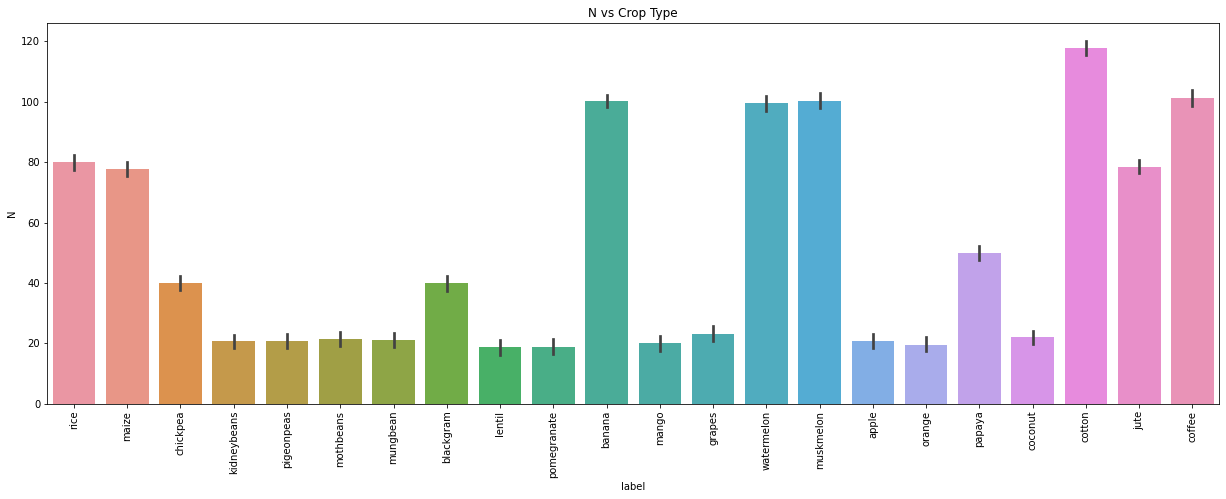

In [21]:
plt.figure(figsize=(21,7))
sns.barplot(x = "label", y = 'N' , data = df);
plt.xticks(rotation=90);
plt.title("N vs Crop Type")
plt.show()
    

In [22]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

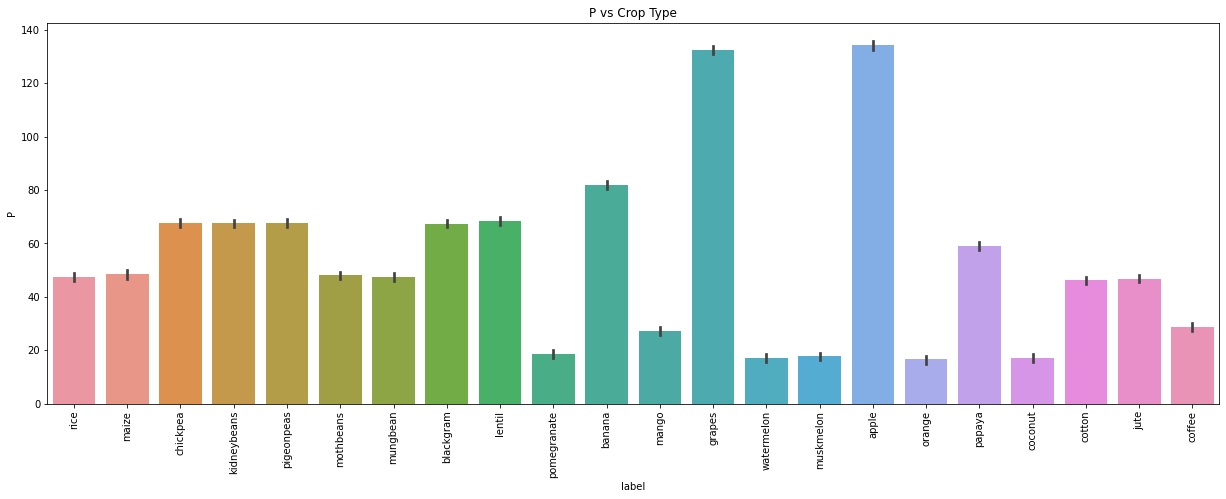

In [23]:
plt.figure(figsize=(21,7))
sns.barplot(x = "label", y = 'P' , data = df);
plt.xticks(rotation=90);
plt.title("P vs Crop Type")
plt.show()

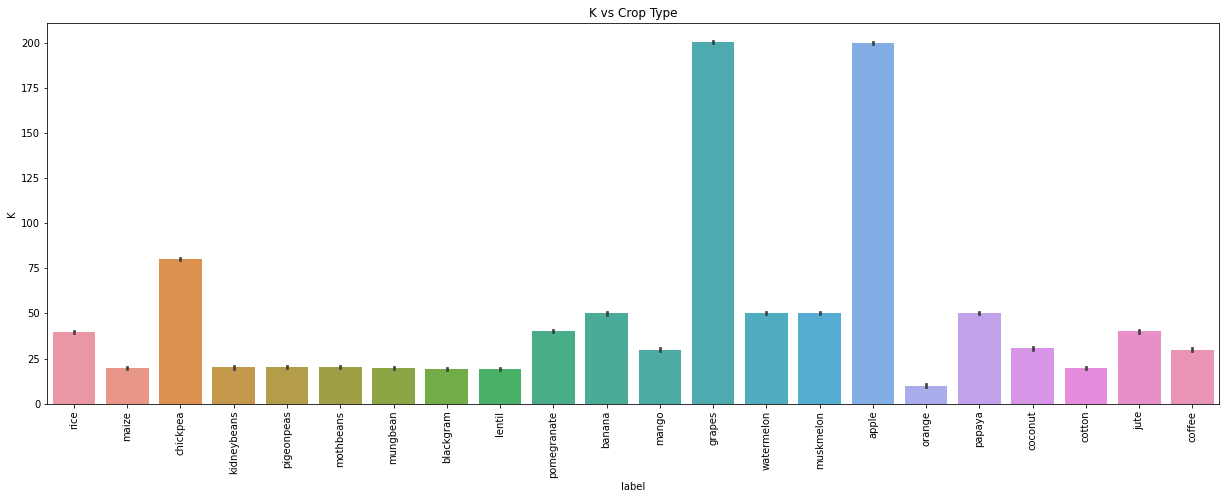

In [24]:
plt.figure(figsize=(21,7))
sns.barplot(x = "label", y = 'K' , data = df);
plt.xticks(rotation=90);
plt.title("K vs Crop Type")
plt.show()

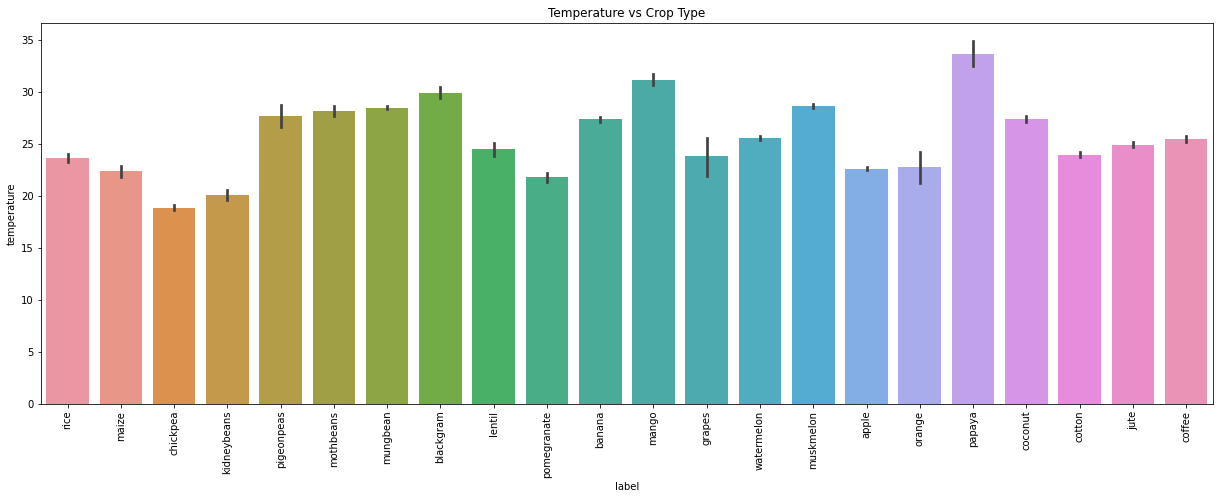

In [25]:
plt.figure(figsize=(21,7))
sns.barplot(x = "label", y = 'temperature' , data = df);
plt.xticks(rotation=90);
plt.title("Temperature vs Crop Type")
plt.show()

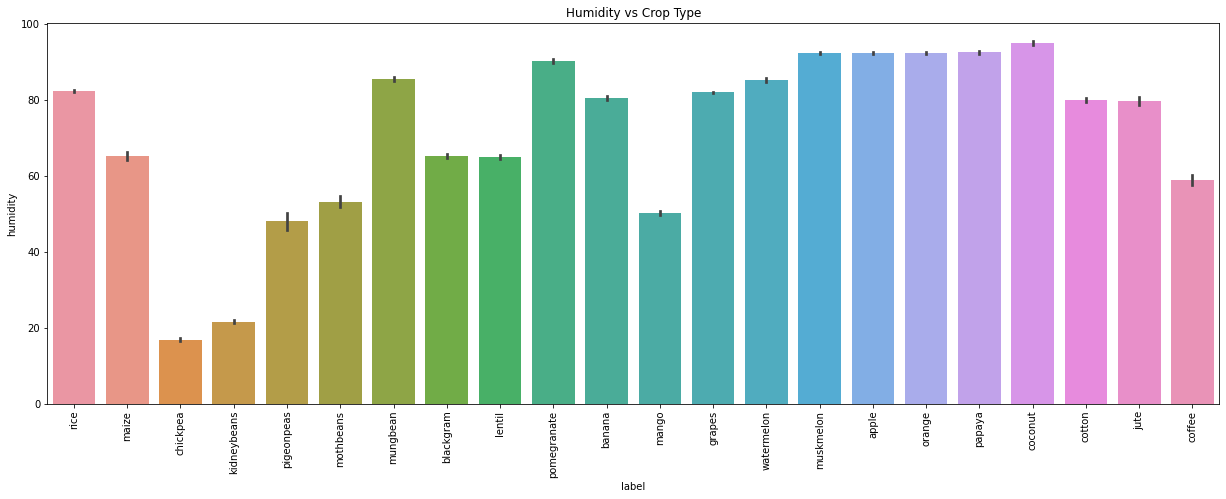

In [26]:
plt.figure(figsize=(21,7))
sns.barplot(x = "label", y = 'humidity' , data = df);
plt.xticks(rotation=90);
plt.title("Humidity vs Crop Type")
plt.show()

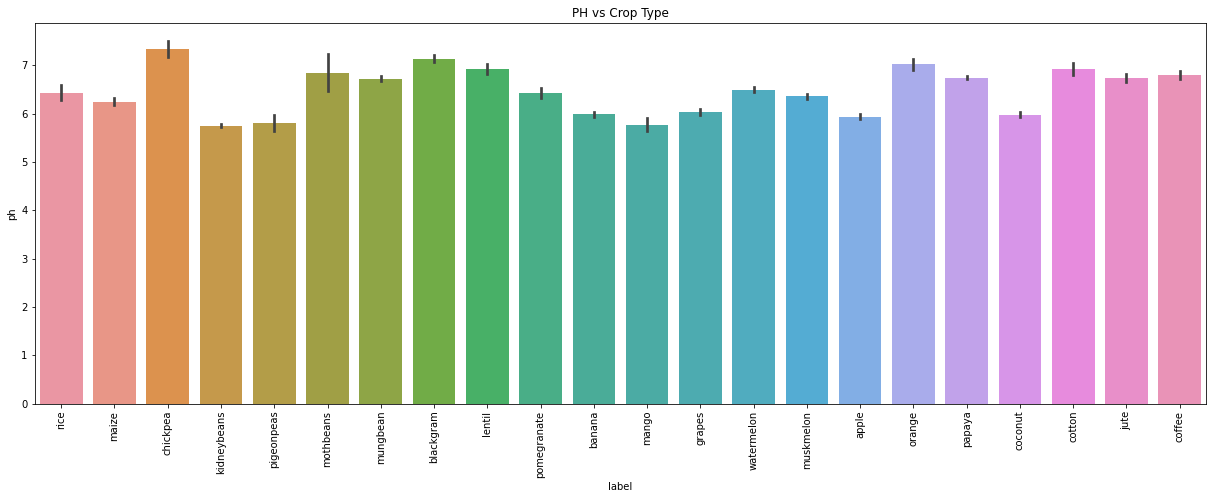

In [27]:
plt.figure(figsize=(21,7))
sns.barplot(x = "label", y = 'ph' , data = df);
plt.xticks(rotation=90);
plt.title("PH vs Crop Type")
plt.show()

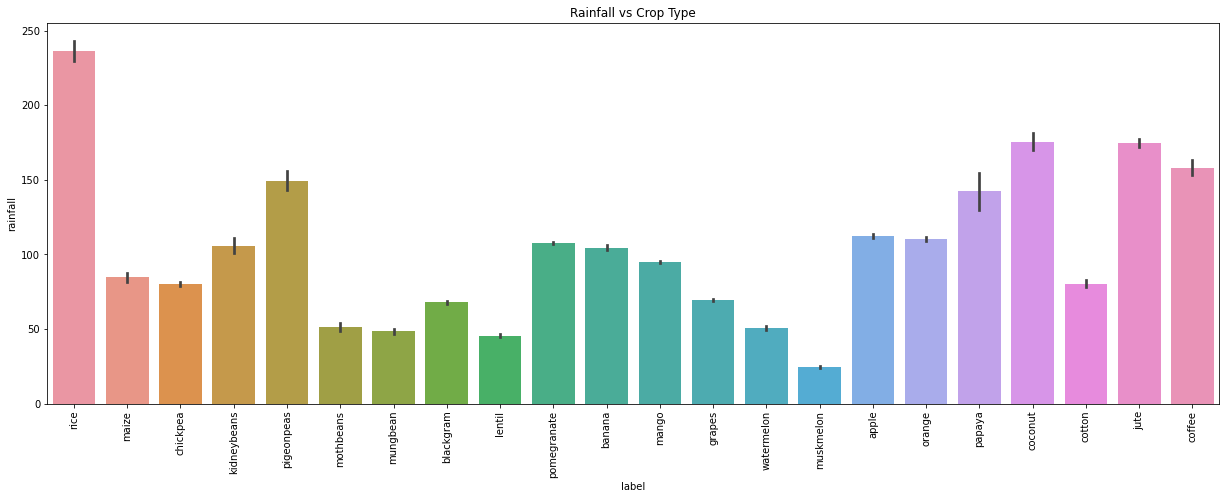

In [28]:
plt.figure(figsize=(21,7))
sns.barplot(x = "label", y = 'rainfall' , data = df);
plt.xticks(rotation=90);
plt.title("Rainfall vs Crop Type")
plt.show()

In [29]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

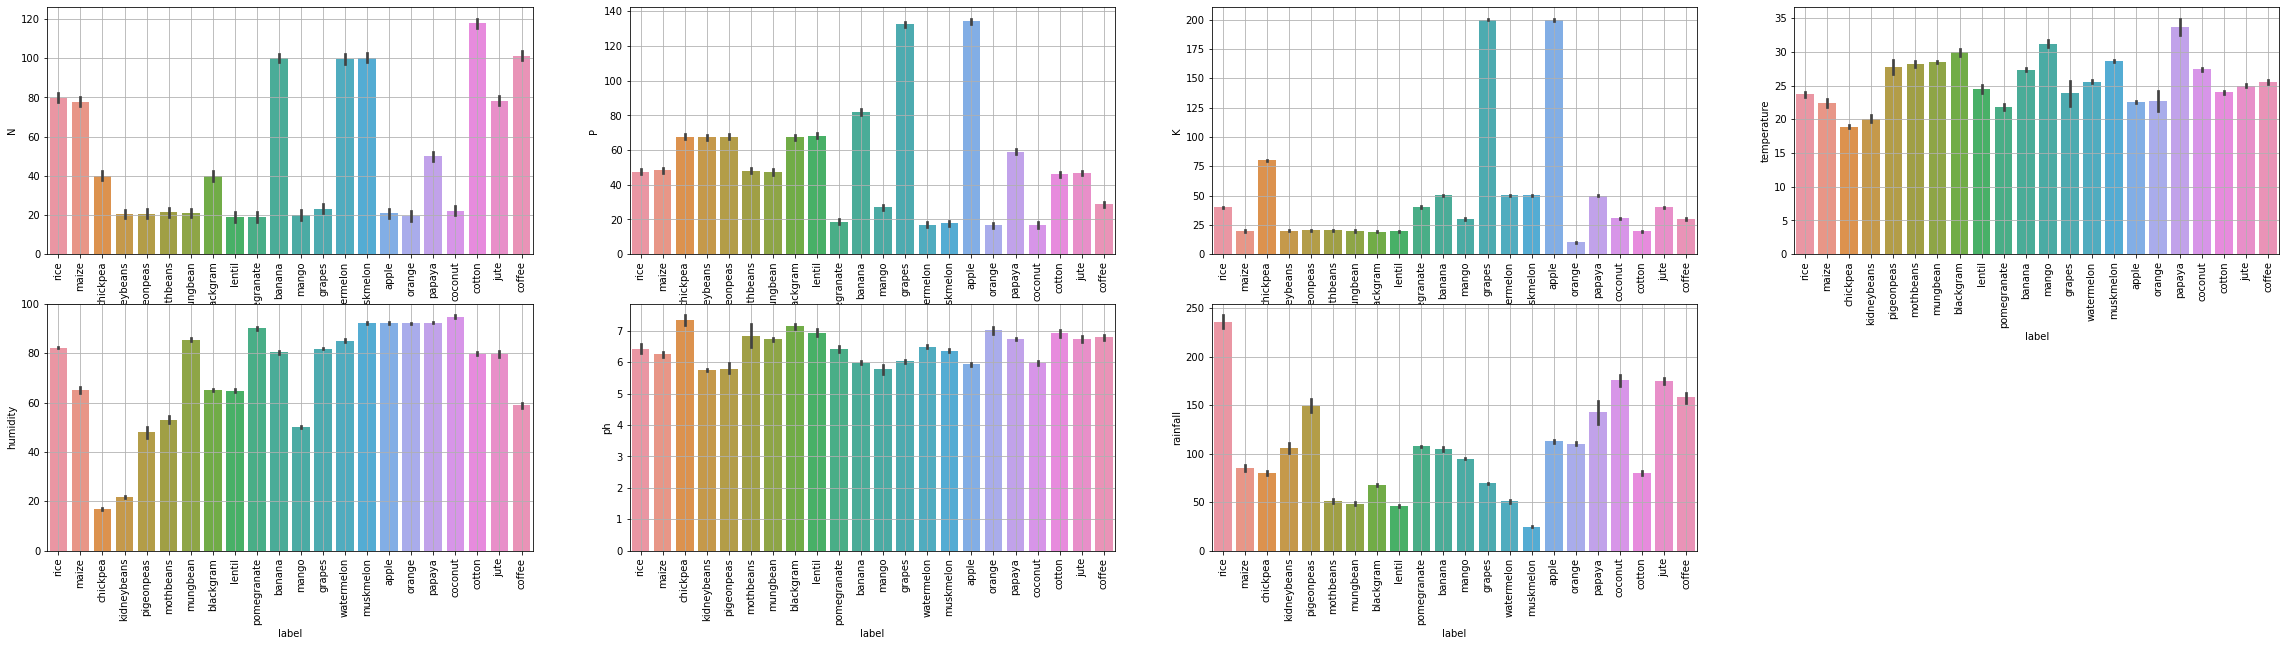

In [30]:
plt.figure(figsize=(40, 10))
plt.subplot(2,4,1)
sns.barplot(x = "label", y = 'N' , data = df);
plt.xticks(rotation=90);
plt.grid()

plt.subplot(2,4,2)
sns.barplot(x = "label", y = 'P' , data = df);
plt.xticks(rotation=90);
plt.grid()

plt.subplot(2,4,3)
sns.barplot(x = "label", y = 'K' , data = df);
plt.xticks(rotation=90);
plt.grid()

plt.subplot(2,4,4)
sns.barplot(x = "label", y = 'temperature' , data = df);
plt.xticks(rotation=90);
plt.grid()

plt.subplot(2,4,5)
sns.barplot(x = "label", y = 'humidity' , data = df);
plt.xticks(rotation=90);
plt.grid()

plt.subplot(2,4,6)
sns.barplot(x = "label", y = 'ph' , data = df);
plt.xticks(rotation=90);
plt.grid()

plt.subplot(2,4,7)
sns.barplot(x = "label", y = 'rainfall' , data = df);
plt.xticks(rotation=90);
plt.grid()





### Seperating features and target label

In [31]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [32]:
# Initialzing empty lists to append all model's name and corresponding name
accuracy = []
models = []

In [33]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

### Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

### Guassian Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      1.00      1.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00  

In [36]:
from sklearn.neighbors import KNeighborsClassifier


In [37]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(Xtrain, Ytrain)
predicted_values = KNN.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('KNN')
print("KNN's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNN's Accuracy is:  0.9704545454545455
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        18
        jute       0.85      0.82      0.84        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.90      0.95        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.0

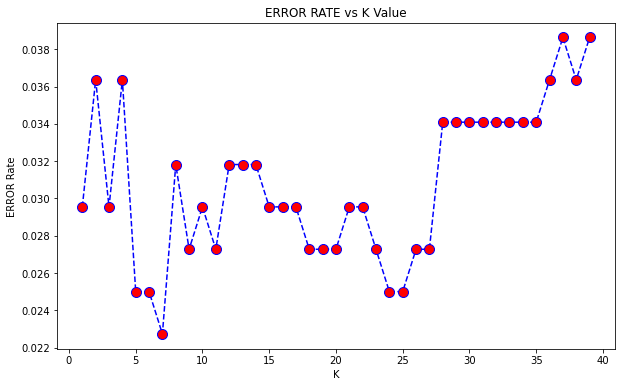

In [38]:
error_rate = []

for i in range(1,40):
    
    KNN = KNeighborsClassifier(n_neighbors=i)
    KNN.fit(Xtrain, Ytrain)
    pred_i = KNN.predict(Xtest)
    error_rate.append(np.mean(pred_i != Ytest))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('ERROR RATE vs K Value')
plt.xlabel('K')
plt.ylabel('ERROR Rate');


In [39]:
KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(Xtrain, Ytrain)
predicted_values = KNN.predict(Xtest)

print(metrics.accuracy_score(Ytest, predicted_values))

print('\n')
print(classification_report(Ytest, predicted_values))

0.9772727272727273


              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        18
        jute       0.89      0.89      0.89        28
 kidneybeans       0.93      1.00      0.97        14
      lentil       0.96      1.00      0.98        23
       maize       1.00      0.95      0.98        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.89      0.94        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00 

### XGBoost

In [42]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
accuracy.append(x)
models.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

[20:18:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       0.96      1.00      0.98        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       1.00      0.93      0.96        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.96      1.00      0.98        

## Accuracy Comparison

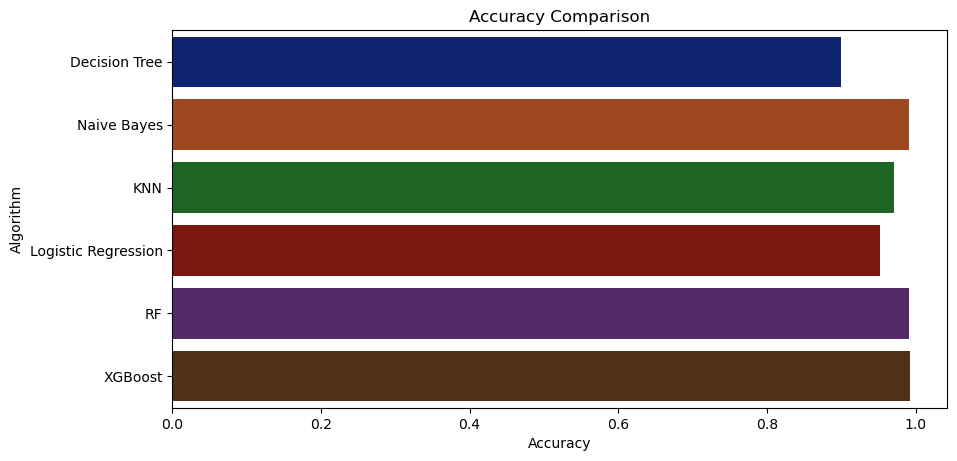

In [43]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = accuracy,y = models,palette='dark');

In [44]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = RF.predict(data)
print(prediction)

['coffee']


In [45]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = RF.predict(data)
print(prediction)

['jute']
